In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import cv2


In [ ]:
concrete['csMPa'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: csMPa, dtype: float64

In [ ]:
from pandas.core.arrays import categorical
concrete = pd.read_csv('/content/Concrete.csv')
concrete.head()
categorical = pd.cut(concrete.csMPa,bins=[0,34,82],labels=['below','above'])
concrete.insert(9,'Category',categorical)

In [ ]:
from sklearn.preprocessing import normalize
concrete = pd.read_csv('/content/Concrete.csv')
data_scaled = normalize(concrete)
data_scaled = pd.DataFrame(data_scaled, columns=concrete.columns)
data_scaled.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,0.395564,0.000000,0.0,0.118669,0.001831,0.761826,0.495187,0.020511,0.058595
1,0.392536,0.000000,0.0,0.117761,0.001817,0.766900,0.491397,0.020354,0.044989
2,0.273422,0.117181,0.0,0.187489,0.000000,0.766403,0.488458,0.222027,0.033115
3,0.268004,0.114859,0.0,0.183774,0.000000,0.751218,0.478781,0.294200,0.033087
4,0.145460,0.096973,0.0,0.140626,0.000000,0.716605,0.604618,0.263673,0.032446


In [ ]:
concrete

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,above
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,above
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,above
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,above
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,above
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,above
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,below
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,below
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,below


In [ ]:
concrete.isnull().values.any()

False

In [ ]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

def kmeans(X, k, data):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X):
         mn_dist = float('inf')
        # dist of the point from all centroids
         for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster
  

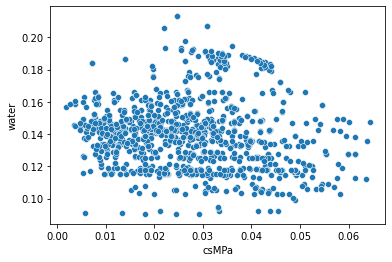

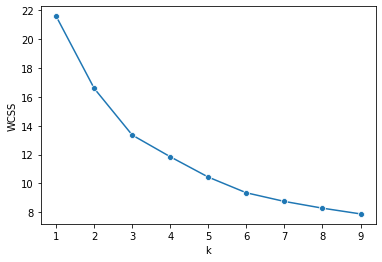

In [ ]:
conc = data_scaled.loc[:, ['csMPa', 'water']]
X = conc.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('csMPa')
plt.ylabel('water')
plt.show()


cost_list = []
for k in range(1, 10):
  centroids, cluster = kmeans(X, k,conc)
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)
  
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()



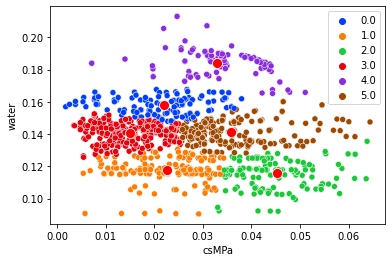

In [ ]:

k = 6
centroids, cluster = kmeans(X, k,conc)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster,palette='bright')
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')
plt.xlabel('csMPa')
plt.ylabel('water')
plt.show()


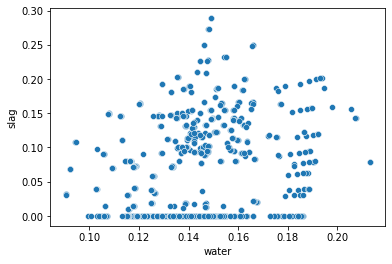

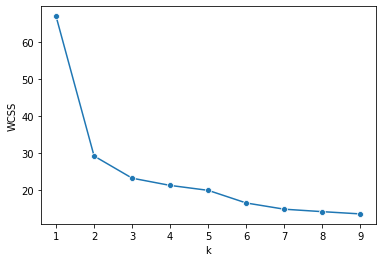

In [ ]:
conc = data_scaled.loc[:, ['water', 'slag']]
X = conc.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('water')
plt.ylabel('slag')
plt.show()


cost_list = []
for k in range(1, 10):
  centroids, cluster = kmeans(X, k,conc)
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)
  
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()



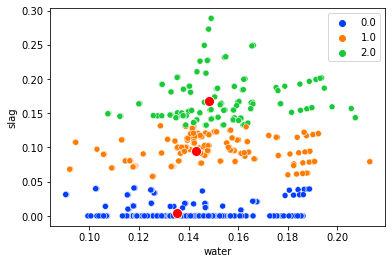

In [ ]:
k = 3
centroids, cluster = kmeans(X, k,conc)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster,palette='bright')
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')
plt.xlabel('water')
plt.ylabel('slag')
plt.show()


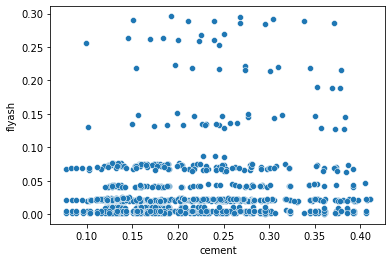

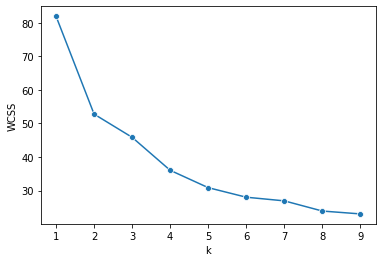

In [ ]:
conc = data_scaled.loc[:, ['cement', 'age']]
X = conc.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('cement')
plt.ylabel('flyash')
plt.show()


cost_list = []
for k in range(1, 10):
  centroids, cluster = kmeans(X, k,conc)
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)
  
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

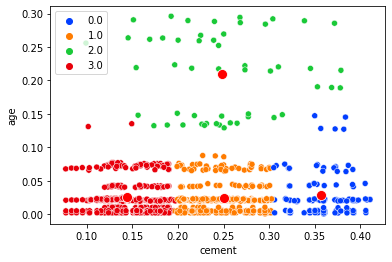

In [ ]:
k = 4
centroids, cluster = kmeans(X, k,conc)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster,palette='bright')
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')
plt.xlabel('cement')
plt.ylabel('age')
plt.show()

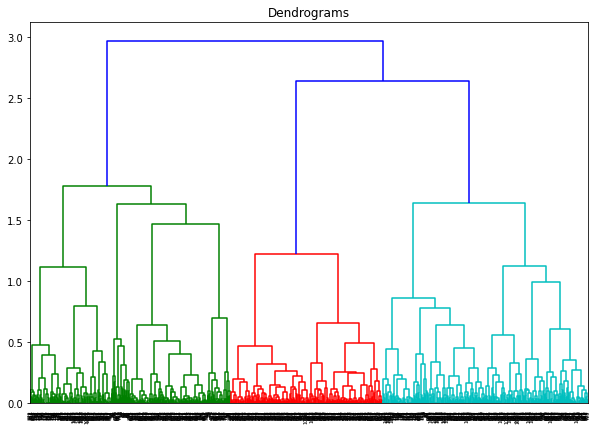

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)

array([0, 0, 2, ..., 1, 1, 1])

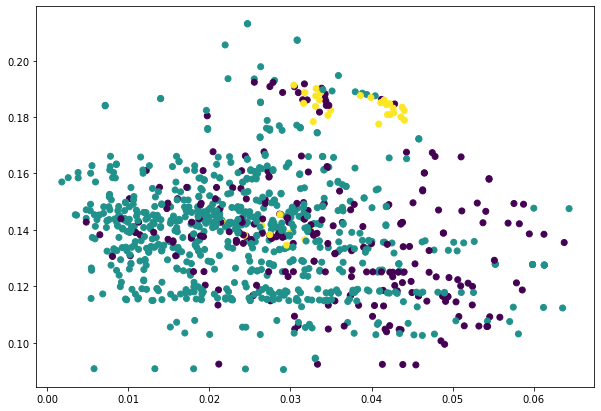

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['csMPa'], data_scaled['water'], c=cluster.labels_) 

In [ ]:
from sklearn import metrics
labels = cluster.labels_
metrics.silhouette_score(data_scaled, labels, metric = 'euclidean')

0.23894487517991

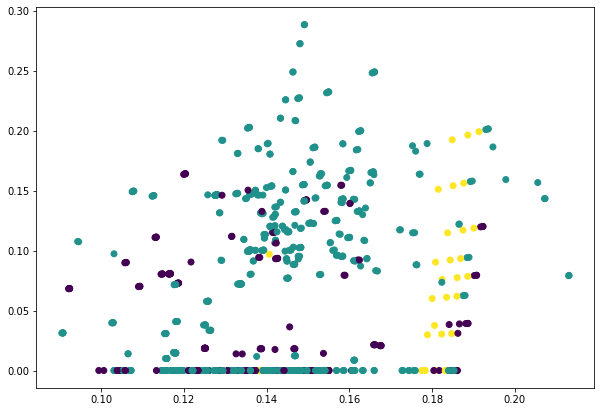

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['water'], data_scaled['slag'], c=cluster.labels_) 

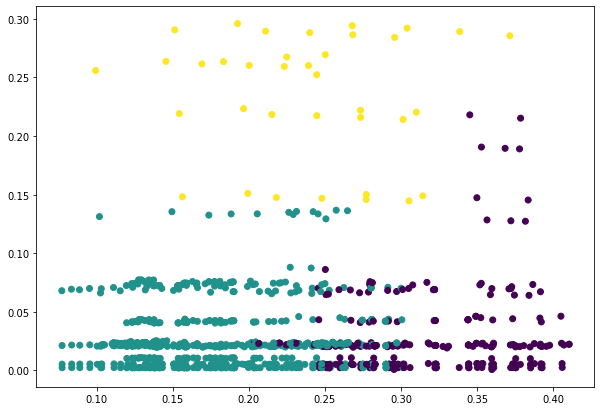

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['cement'], data_scaled['age'], c=cluster.labels_) 

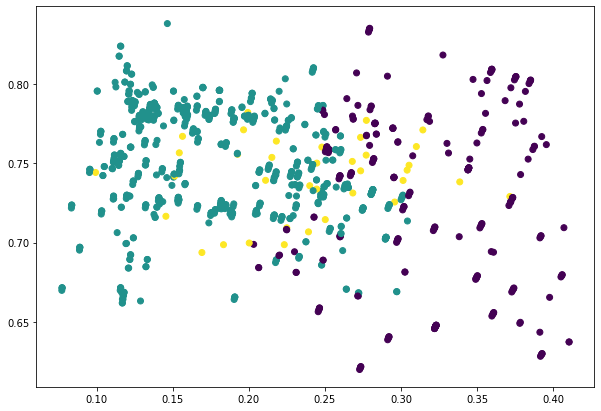

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['cement'], data_scaled['coarseaggregate'], c=cluster.labels_) 